In [32]:
import pandas as pd
import numpy as np
import os
import math
import matplotlib.pyplot as plt

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Dataset

## Download Data

In [ ]:
if not os.path.exists('./data'):
    ! mkdir data
if os.path.getsize('./data') == 0:
    ! kaggle competitions download -c titanic
    ! mv titanic.zip data/
    ! unzip -q data/titanic.zip -d data/
    ! rm data/titanic.zip

## About Data

| Variable | Definition | Key |
| --- | --- | --- |
survival |	Survival |	0 = No, 1 = Yes
pclass |	Ticket class |	1 = 1st, 2 = 2nd, 3 = 3rd
sex	| Sex	
Age |	Age in years 
sibsp	|# of siblings / spouses aboard the Titanic	
parch	|# of parents / children aboard the Titanic	
ticket	|Ticket number	
fare	|Passenger fare	
cabin	|Cabin number	
embarked |	Port of Embarkation	|C = Cherbourg, Q = Queenstown, S = Southampton

## Load Data

In [ ]:
train_df = pd.read_csv('./data/train.csv', index_col=0)
test_df = pd.read_csv('./data/test.csv', index_col=0)

### preview

In [35]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_df.info()
test_df.info()

In [27]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [28]:
train_df.describe(include=['O']) 

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


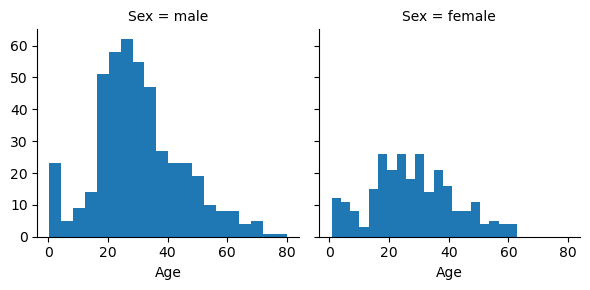

In [40]:
g = sns.FacetGrid(train_df, col='Sex')
g.map(plt.hist, 'Age', bins=20)

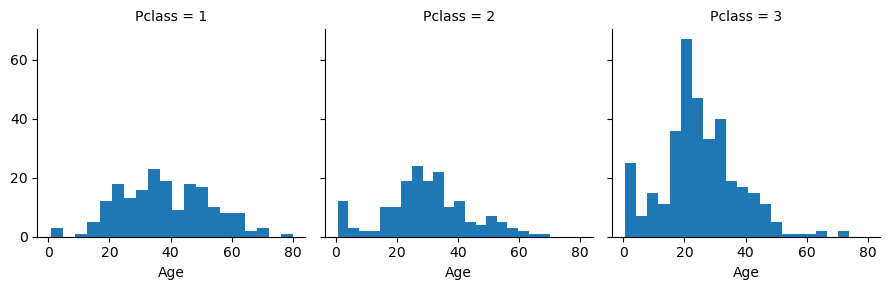

In [42]:
g = sns.FacetGrid(train_df, col='Pclass')
g.map(plt.hist, 'Age', bins=20)

/home/macheng/anaconda3/envs/quant/lib/python3.8/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


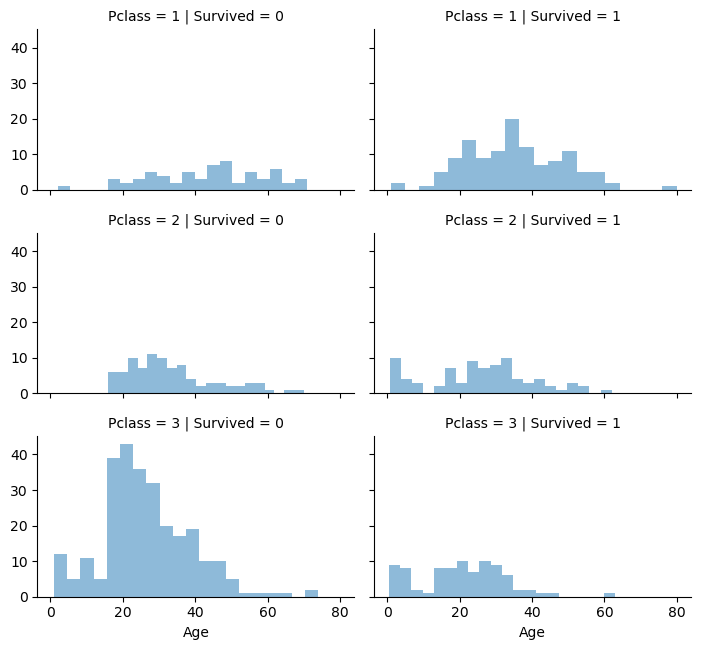

In [41]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()